In [1]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt # type: ignore
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder,StandardScaler # type: ignore
from sklearn.model_selection import GridSearchCV # type: ignore


In [2]:
df=pd.read_csv("C://Users//Happy//Desktop//capstone//final project//loan_default_prediction_project_complete.csv")
df.tail()

,Age,Gender,Income,Employment_Status,Location,Credit_Score,Debt_to_Income_Ratio,Existing_Loan_Balance,Loan_Status,Loan_Amount,Interest_Rate,Loan_Duration_Months
9995,33,Male,94318.593216,Employed,Rural,359,0.458550,32652.095340,Non-Default,13581.669336,15.286204,58
9996,29,Female,22480.468746,Employed,Urban,671,0.310884,30803.407227,Non-Default,28718.251112,6.409365,71
9997,18,Male,88172.496665,Employed,Urban,441,0.282163,8665.007815,Default,22755.220904,8.818762,51
9998,25,NaN,51788.871823,Employed,Rural,417,0.370681,36921.116660,Non-Default,29066.184090,14.516478,50
9999,30,Male,64928.131098,Employed,Urban,491,0.398061,38011.311647,Non-Default,15382.129443,12.316036,39


In [3]:
df= df[['Location','Employment_Status', 'Age', 'Gender', 'Income', 'Credit_Score', 
       'Debt_to_Income_Ratio', 'Loan_Amount', 'Existing_Loan_Balance','Interest_Rate',
       'Loan_Duration_Months', 'Loan_Status']]
df.tail()

,Location,Employment_Status,Age,Gender,Income,Credit_Score,Debt_to_Income_Ratio,Loan_Amount,Existing_Loan_Balance,Interest_Rate,Loan_Duration_Months,Loan_Status
9995,Rural,Employed,33,Male,94318.593216,359,0.458550,13581.669336,32652.095340,15.286204,58,Non-Default
9996,Urban,Employed,29,Female,22480.468746,671,0.310884,28718.251112,30803.407227,6.409365,71,Non-Default
9997,Urban,Employed,18,Male,88172.496665,441,0.282163,22755.220904,8665.007815,8.818762,51,Default
9998,Rural,Employed,25,NaN,51788.871823,417,0.370681,29066.184090,36921.116660,14.516478,50,Non-Default
9999,Urban,Employed,30,Male,64928.131098,491,0.398061,15382.129443,38011.311647,12.316036,39,Non-Default


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               10000 non-null  object 
 1   Employment_Status      9013 non-null   object 
 2   Age                    10000 non-null  int64  
 3   Gender                 8005 non-null   object 
 4   Income                 10000 non-null  float64
 5   Credit_Score           10000 non-null  int64  
 6   Debt_to_Income_Ratio   10000 non-null  float64
 7   Loan_Amount            10000 non-null  float64
 8   Existing_Loan_Balance  10000 non-null  float64
 9   Interest_Rate          10000 non-null  float64
 10  Loan_Duration_Months   10000 non-null  int64  
 11  Loan_Status            10000 non-null  object 
dtypes: float64(5), int64(3), object(4)
memory usage: 937.6+ KB


In [5]:
df = df.drop(['Gender', 'Debt_to_Income_Ratio'], axis=1)

In [6]:
df

,Location,Employment_Status,Age,Income,Credit_Score,Loan_Amount,Existing_Loan_Balance,Interest_Rate,Loan_Duration_Months,Loan_Status
0,Urban,Employed,56,91910.323246,615,27160.609602,3580.203540,11.562543,27,Non-Default
1,Urban,NaN,46,81880.547904,702,22931.663587,38762.098480,5.241453,54,Non-Default
2,Suburban,Unemployed,32,89696.082903,747,6787.299376,8412.342168,6.928529,55,Non-Default
3,Suburban,NaN,60,37123.175342,846,29646.934665,2051.077370,14.422941,17,Non-Default
4,Rural,Unemployed,25,67655.479665,425,11137.769677,29518.957965,10.970186,21,Default
...,...,...,...,...,...,...,...,...,...,...
9995,Rural,Employed,33,94318.593216,359,13581.669336,32652.095340,15.286204,58,Non-Default
9996,Urban,Employed,29,22480.468746,671,28718.251112,30803.407227,6.409365,71,Non-Default
9997,Urban,Employed,18,88172.496665,441,22755.220904,8665.007815,8.818762,51,Default
9998,Rural,Employed,25,51788.871823,417,29066.184090,36921.116660,14.516478,50,Non-Default


In [7]:
df.isna().sum()

Location                   0
Employment_Status        987
Age                        0
Income                     0
Credit_Score               0
Loan_Amount                0
Existing_Loan_Balance      0
Interest_Rate              0
Loan_Duration_Months       0
Loan_Status                0
dtype: int64

In [8]:
a=df["Income"]<50000

In [9]:
a.value_counts()

Income
False    6177
True     3823
Name: count, dtype: int64

**Handelling the null values**

In [10]:
fill_mode=["Employment_Status"]
mode=df[fill_mode].mode().iloc[0]
df[fill_mode]=df[fill_mode].fillna(mode)

In [11]:
df.isna().sum()

Location                 0
Employment_Status        0
Age                      0
Income                   0
Credit_Score             0
Loan_Amount              0
Existing_Loan_Balance    0
Interest_Rate            0
Loan_Duration_Months     0
Loan_Status              0
dtype: int64

In [12]:
df.tail()

,Location,Employment_Status,Age,Income,Credit_Score,Loan_Amount,Existing_Loan_Balance,Interest_Rate,Loan_Duration_Months,Loan_Status
9995,Rural,Employed,33,94318.593216,359,13581.669336,32652.095340,15.286204,58,Non-Default
9996,Urban,Employed,29,22480.468746,671,28718.251112,30803.407227,6.409365,71,Non-Default
9997,Urban,Employed,18,88172.496665,441,22755.220904,8665.007815,8.818762,51,Default
9998,Rural,Employed,25,51788.871823,417,29066.184090,36921.116660,14.516478,50,Non-Default
9999,Urban,Employed,30,64928.131098,491,15382.129443,38011.311647,12.316036,39,Non-Default


In [13]:
es=df["Employment_Status"].unique()
loc=df["Location"].unique()
ls=df["Loan_Status"].unique()

print(es)
print(loc)
print(ls)


['Employed' 'Unemployed']
['Urban' 'Suburban' 'Rural']
['Non-Default' 'Default']


In [14]:
employment_counts = df['Employment_Status'].value_counts()
residence_counts = df['Location'].value_counts()
loan_counts = df['Loan_Status'].value_counts()

print(employment_counts)
print(residence_counts)
print(loan_counts)

Employment_Status
Employed      6980
Unemployed    3020
Name: count, dtype: int64
Location
Urban       3379
Suburban    3318
Rural       3303
Name: count, dtype: int64
Loan_Status
Non-Default    8033
Default        1967
Name: count, dtype: int64


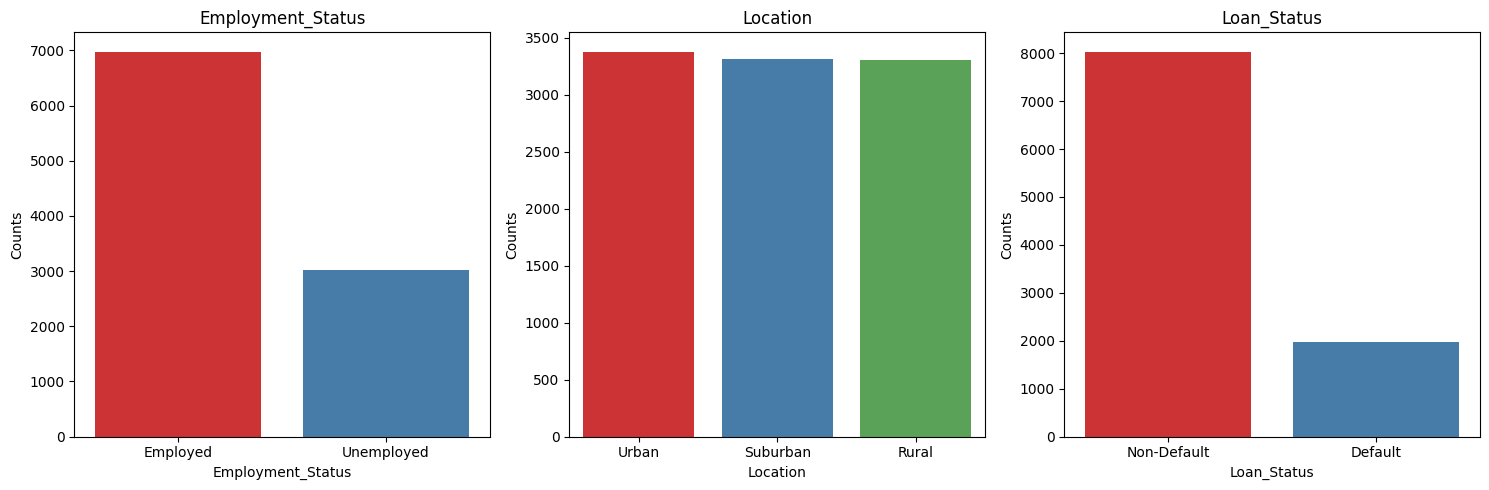

In [15]:
columns = ['Employment_Status', 'Location', 'Loan_Status']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for i, col in enumerate(columns):
    sns.countplot(ax=axes[i], data=df, x=col,palette='Set1')
    axes[i].set_title(col)
    axes[i].set_ylabel('Counts')

plt.tight_layout()
plt.show()

In [16]:
df.head()

,Location,Employment_Status,Age,Income,Credit_Score,Loan_Amount,Existing_Loan_Balance,Interest_Rate,Loan_Duration_Months,Loan_Status
0,Urban,Employed,56,91910.323246,615,27160.609602,3580.203540,11.562543,27,Non-Default
1,Urban,Employed,46,81880.547904,702,22931.663587,38762.098480,5.241453,54,Non-Default
2,Suburban,Unemployed,32,89696.082903,747,6787.299376,8412.342168,6.928529,55,Non-Default
3,Suburban,Employed,60,37123.175342,846,29646.934665,2051.077370,14.422941,17,Non-Default
4,Rural,Unemployed,25,67655.479665,425,11137.769677,29518.957965,10.970186,21,Default


In [17]:
df["Location"]=LabelEncoder().fit_transform(df["Location"])
df["Loan_Status"]=LabelEncoder().fit_transform(df["Loan_Status"])
df["Employment_Status"]=LabelEncoder().fit_transform(df["Employment_Status"])

In [18]:
df.tail()

,Location,Employment_Status,Age,Income,Credit_Score,Loan_Amount,Existing_Loan_Balance,Interest_Rate,Loan_Duration_Months,Loan_Status
9995,0,0,33,94318.593216,359,13581.669336,32652.095340,15.286204,58,1
9996,2,0,29,22480.468746,671,28718.251112,30803.407227,6.409365,71,1
9997,2,0,18,88172.496665,441,22755.220904,8665.007815,8.818762,51,0
9998,0,0,25,51788.871823,417,29066.184090,36921.116660,14.516478,50,1
9999,2,0,30,64928.131098,491,15382.129443,38011.311647,12.316036,39,1


In [19]:
df["Location"].unique()

array([2, 1, 0])

In [20]:
df["Loan_Status"].unique()

array([1, 0])

In [21]:
df

,Location,Employment_Status,Age,Income,Credit_Score,Loan_Amount,Existing_Loan_Balance,Interest_Rate,Loan_Duration_Months,Loan_Status
0,2,0,56,91910.323246,615,27160.609602,3580.203540,11.562543,27,1
1,2,0,46,81880.547904,702,22931.663587,38762.098480,5.241453,54,1
2,1,1,32,89696.082903,747,6787.299376,8412.342168,6.928529,55,1
3,1,0,60,37123.175342,846,29646.934665,2051.077370,14.422941,17,1
4,0,1,25,67655.479665,425,11137.769677,29518.957965,10.970186,21,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,33,94318.593216,359,13581.669336,32652.095340,15.286204,58,1
9996,2,0,29,22480.468746,671,28718.251112,30803.407227,6.409365,71,1
9997,2,0,18,88172.496665,441,22755.220904,8665.007815,8.818762,51,0
9998,0,0,25,51788.871823,417,29066.184090,36921.116660,14.516478,50,1


In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Location,10000.0,1.007600,0.817441,0.000000,0.000000,1.000000,2.000000,2.000000
Employment_Status,10000.0,0.302000,0.459148,0.000000,0.000000,0.000000,1.000000,1.000000
Age,10000.0,41.054000,13.484104,18.000000,30.000000,41.000000,53.000000,64.000000
Income,10000.0,60026.281455,23325.125697,20000.743678,39846.858060,59841.754386,80025.261332,150000.000000
Credit_Score,10000.0,575.114100,156.836488,250.000000,443.000000,578.000000,709.000000,849.000000
Loan_Amount,10000.0,27420.008134,12929.128033,5021.968396,16202.680782,27465.829975,38546.866743,49983.285875
Existing_Loan_Balance,10000.0,24987.100093,14553.399559,5.755463,12390.943603,24815.252605,37840.503151,49983.832438
Interest_Rate,10000.0,11.520288,4.904728,3.003891,7.252370,11.572578,15.705539,19.998504
Loan_Duration_Months,10000.0,41.251400,17.309152,12.000000,26.000000,41.000000,56.000000,71.000000
Loan_Status,10000.0,0.803300,0.397523,0.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
x=df[['Location','Employment_Status', 'Age', 'Income', 'Credit_Score', 'Loan_Amount', 'Existing_Loan_Balance','Interest_Rate',
       'Loan_Duration_Months', 'Loan_Status']].corr()

<Axes: >

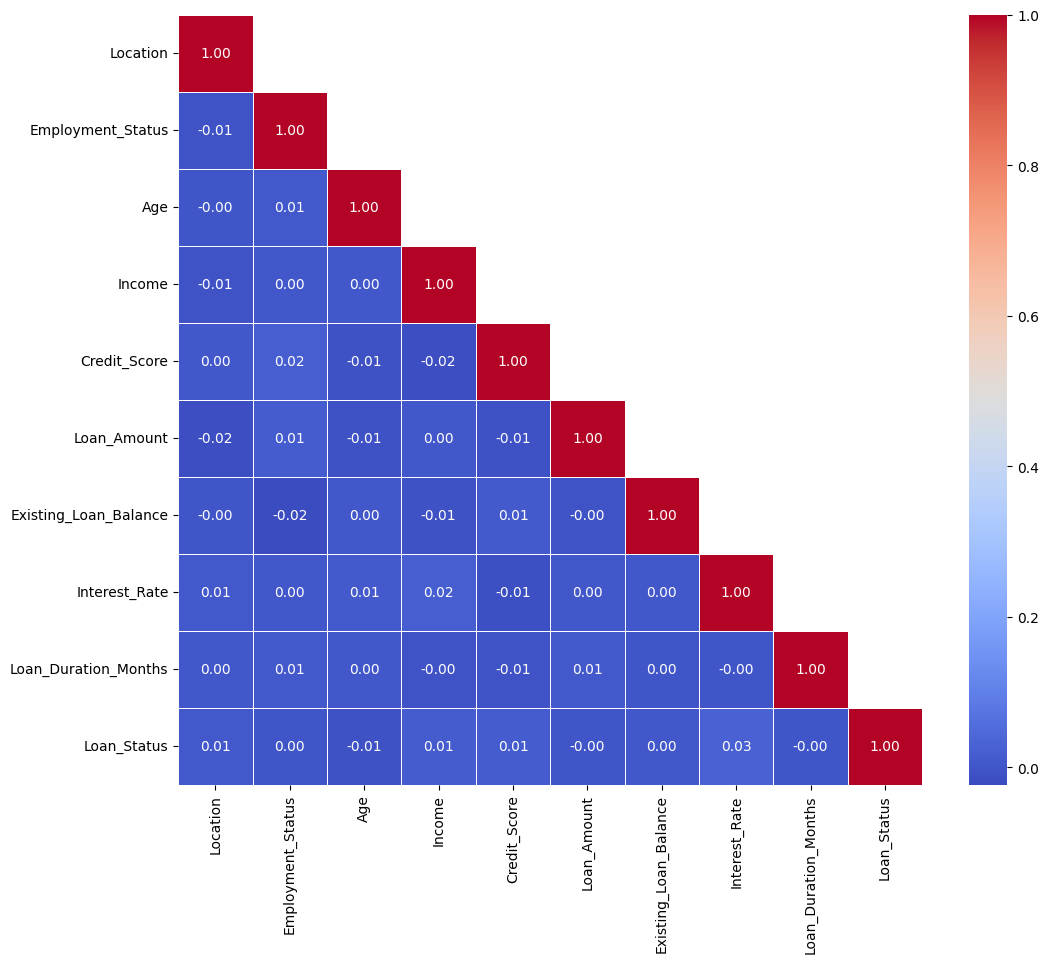

In [24]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(x, annot=True,mask=np.triu(x.corr(),+1),fmt=".2f",cmap="coolwarm",linewidths=0.5)

**Most of the correlations are very close to 0, indicating weak correlations between these pairs of variables**
**No strong correlations (either positive or negative) are evident from this heatmap, as most values are around 0.0**

**EDA**

In [27]:
def out_skew(df,column):
    #skewness
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.kdeplot(df[column])
    plt.title("Skewness of"+" "+column)

    #outlier
    plt.subplot(1,2,2)
    sns.boxplot(df[column])
    plt.title("outlier of"+" "+column)


    plt.tight_layout()
    plt.show()

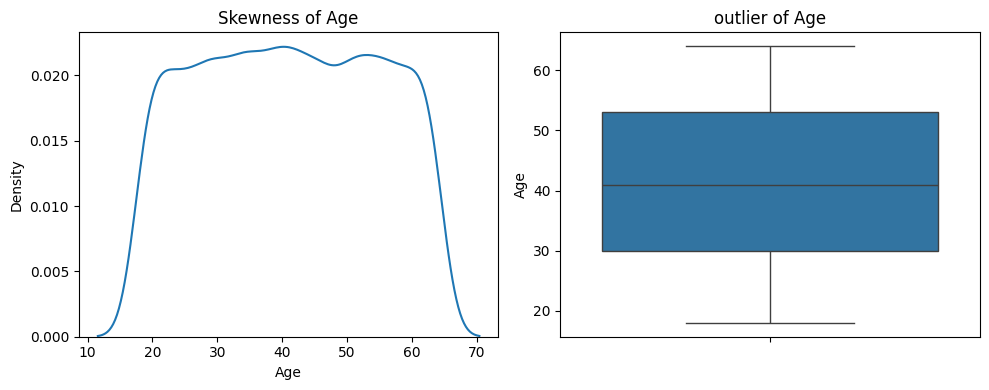

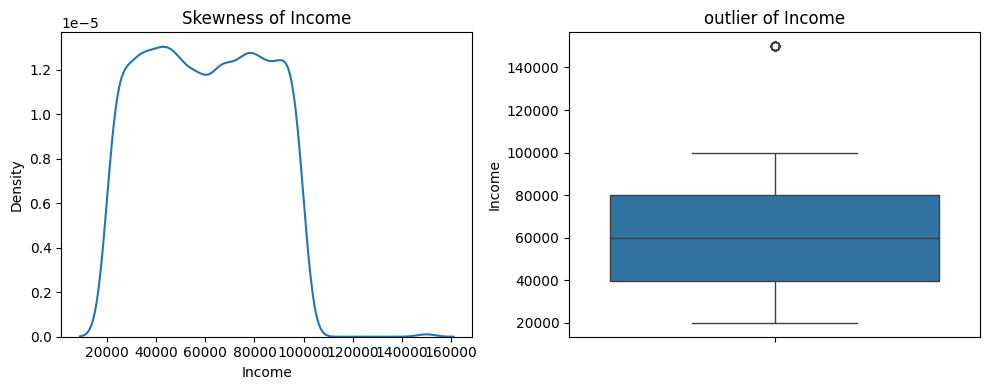

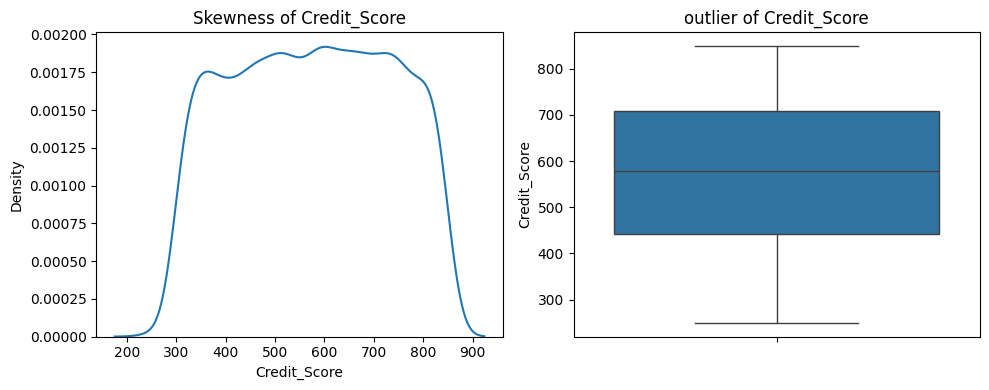

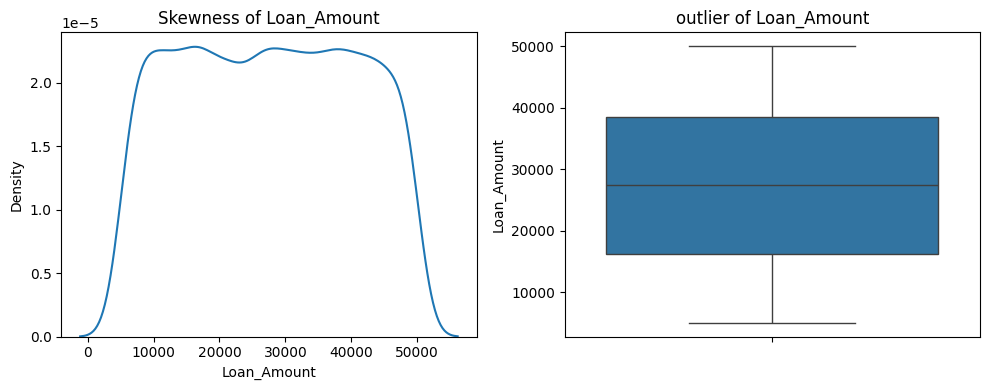

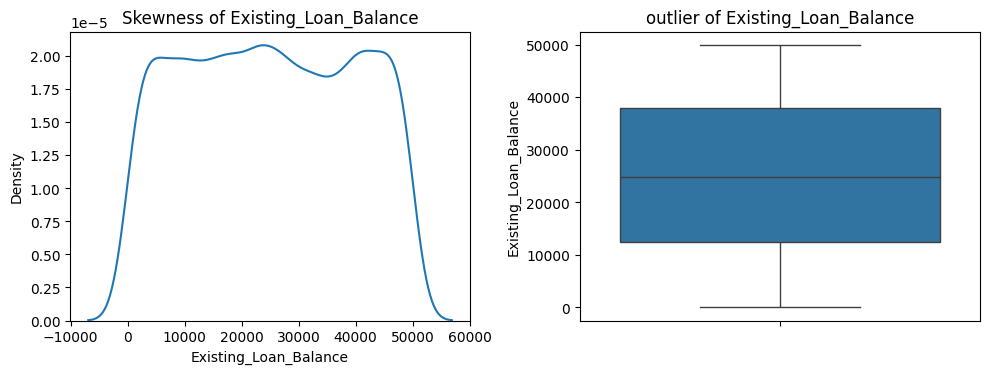

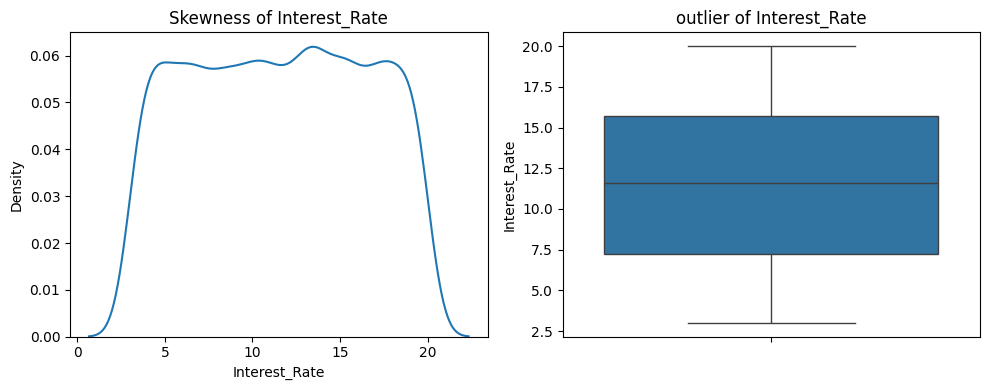

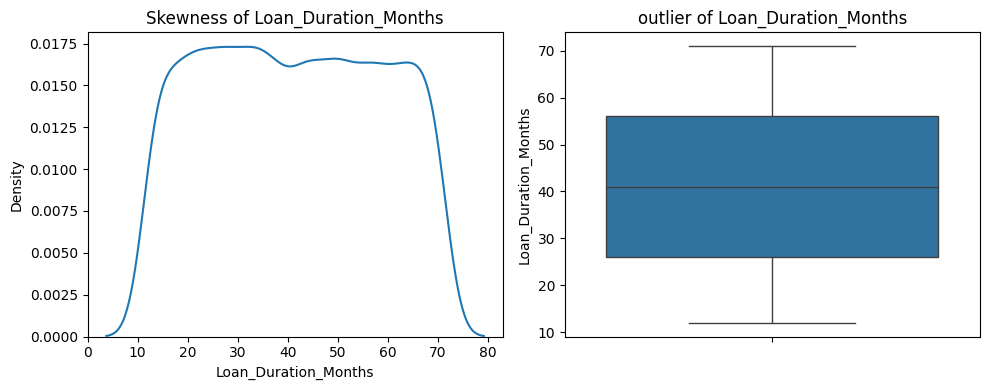

In [28]:

columns= [ 'Age', 'Income', 'Credit_Score', 'Loan_Amount', 'Existing_Loan_Balance','Interest_Rate',
       'Loan_Duration_Months']
for i in columns:
  out_skew(df,i)

In [29]:
df[columns].skew()

Age                     -0.000372
Income                   0.053562
Credit_Score            -0.024119
Loan_Amount              0.006925
Existing_Loan_Balance    0.011286
Interest_Rate           -0.011642
Loan_Duration_Months     0.023721
dtype: float64

In [30]:
index1=df[df["Income"]>100000].index

In [31]:
df.drop(index1,inplace=True)

In [32]:
#def wisker(df,column):
#    q1= df[column].quantile(0.25)
#    q3= df[column].quantile(0.75)
#    iqr= q3-q1
#    lw= q1-1.5*iqr
#    uw= q3+1.5*iqr

#    df[column]= df[column].clip(lw, uw)

    #df[(df[column] >= lw) & (df[column] <= uw)]

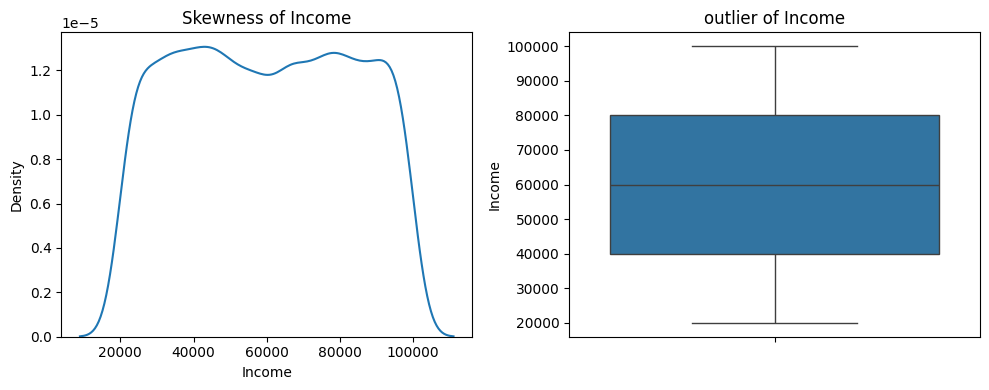

In [33]:
outlier_columns=["Income"]
for i in outlier_columns:
  out_skew(df,i)

In [34]:
df['Loan_Status'].value_counts()

Loan_Status
1    8024
0    1966
Name: count, dtype: int64

In [35]:
from imblearn.over_sampling import RandomOverSampler # type: ignore

X = df.drop(['Loan_Status'], axis=1)
y = df["Loan_Status"]

ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)

In [36]:
y_res.value_counts()

Loan_Status
1    8024
0    8024
Name: count, dtype: int64

In [37]:
X_res.shape

(16048, 9)

In [38]:
y_res.shape

(16048,)

In [48]:
from sklearn.linear_model import LogisticRegression # type: ignore
from sklearn.svm import SVC # type: ignore
from sklearn.neighbors import KNeighborsClassifier # type: ignore
from sklearn.ensemble import RandomForestClassifier # type: ignore
from sklearn.tree import DecisionTreeClassifier # type: ignore
from sklearn.ensemble import GradientBoostingClassifier # type: ignore
from sklearn.metrics import accuracy_score # type: ignore
from sklearn.model_selection import train_test_split # type: ignore
from sklearn.metrics import confusion_matrix, classification_report # type: ignore
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


In [40]:
scaler = StandardScaler().fit(X_res)
X = scaler.transform(X_res)

In [41]:
x_train, x_test, y_train, y_test = train_test_split(X, y_res, test_size=0.2, random_state=20)

In [42]:
def algorithms(df,algo):

    model = algo().fit(x_train, y_train)

    y_pred_train= model.predict(x_train)
    y_pred_test= model.predict(x_test)

    train_acc_scr= accuracy_score(y_train, y_pred_train)
    test_acc_scr= accuracy_score(y_test, y_pred_test)

    print("Model Name : ", algo.__name__)
    print("Training Data Accuracy Score : ",train_acc_scr)
    print("Test Data Accuracy Score : ",test_acc_scr)
    print(" ")

In [43]:
algorithms(df,LogisticRegression)
algorithms(df,DecisionTreeClassifier)
algorithms(df,SVC)
algorithms(df,KNeighborsClassifier)
algorithms(df,RandomForestClassifier)
algorithms(df,GradientBoostingClassifier)

Model Name :  LogisticRegression
Training Data Accuracy Score :  0.5166692631250974
Test Data Accuracy Score :  0.52398753894081
 
Model Name :  DecisionTreeClassifier
Training Data Accuracy Score :  1.0
Test Data Accuracy Score :  0.8641744548286604
 
Model Name :  SVC
Training Data Accuracy Score :  0.6498675806200342
Test Data Accuracy Score :  0.5900311526479751
 
Model Name :  KNeighborsClassifier
Training Data Accuracy Score :  0.8047203614270135
Test Data Accuracy Score :  0.6825545171339564
 
Model Name :  RandomForestClassifier
Training Data Accuracy Score :  1.0
Test Data Accuracy Score :  0.9710280373831776
 
Model Name :  GradientBoostingClassifier
Training Data Accuracy Score :  0.6594485122293192
Test Data Accuracy Score :  0.608411214953271
 


In [85]:
param = {
    'max_depth': [5,10,20,30],
    'min_samples_split': [5,10,15,20],
    'min_samples_leaf': [2,5,7],
    'max_features': ['log2','sqrt']
}
grid_searchcv = GridSearchCV(DecisionTreeClassifier(),param_grid = param,  cv = 5)
grid_searchcv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 10, 20, 30],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [2, 5, 7],
                         'min_samples_split': [5, 10, 15, 20]})

In [86]:
best_params = grid_searchcv.best_params_
print("Best parameters found: ", best_params)

best_estimator = grid_searchcv.best_estimator_
print("Best estimator found: ", best_estimator)

best_score = grid_searchcv.best_score_
print("Best cross-validation score: ", best_score)

Best parameters found:  {'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5}
Best estimator found:  DecisionTreeClassifier(max_depth=30, max_features='log2', min_samples_leaf=2,
                       min_samples_split=5)
Best cross-validation score:  0.8005131327767847


In [42]:
model_Dtc = DecisionTreeClassifier(max_depth=30,min_samples_split=5,min_samples_leaf=2,max_features='log2')

model_Dtc.fit(x_train, y_train)

y_pred_train= model_Dtc.predict(x_train)
dtc_ypred= model_Dtc.predict(x_test)

train_acc_scr= accuracy_score(y_train, y_pred_train)
test_acc_scr= accuracy_score(y_test, dtc_ypred)

print(train_acc_scr)
print(test_acc_scr)

0.9293503661006387
0.8090342679127726


In [43]:
print("DecisionTreeClassifier")
result = confusion_matrix(y_test, dtc_ypred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, dtc_ypred)
print("Classification Report:")
print(result1)

DecisionTreeClassifier
Confusion Matrix:
[[1480  146]
 [ 467 1117]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.91      0.83      1626
           1       0.88      0.71      0.78      1584

    accuracy                           0.81      3210
   macro avg       0.82      0.81      0.81      3210
weighted avg       0.82      0.81      0.81      3210



In [89]:
param = {
    'n_estimators' : [50,80,100],
    'max_depth': [20,30,50],
    'min_samples_split': [2,5,7],
    'min_samples_leaf': [2,5,7],
    'max_features': ['log2','sqrt']
}
grid_searchcv = GridSearchCV(RandomForestClassifier(),param_grid = param)
grid_searchcv.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [20, 30, 50],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [2, 5, 7],
                         'min_samples_split': [2, 5, 7],
                         'n_estimators': [50, 80, 100]})

In [90]:
best_params = grid_searchcv.best_params_
print("Best parameters found: ", best_params)

best_estimator = grid_searchcv.best_estimator_
print("Best estimator found: ", best_estimator)

best_score = grid_searchcv.best_score_
print("Best cross-validation score: ", best_score)

Best parameters found:  {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best estimator found:  RandomForestClassifier(max_depth=30, min_samples_leaf=2)
Best cross-validation score:  0.9397881025282551


In [44]:
model_rfc = RandomForestClassifier(n_estimators=100,max_depth= 30 ,max_features='log2' ,min_samples_leaf=2, min_samples_split=2)
model_rfc.fit(x_train, y_train)

y_pred_train= model_rfc.predict(x_train)
rfc_ypred= model_rfc.predict(x_test)

train_acc_scr= accuracy_score(y_train, y_pred_train)
test_acc_scr= accuracy_score(y_test, rfc_ypred)

print(train_acc_scr)
print(test_acc_scr)


0.9993768499766319
0.9663551401869159


In [45]:
print("RandomForestClassifier")
result = confusion_matrix(y_test, rfc_ypred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, rfc_ypred)
print("Classification Report:")
print(result1)

RandomForestClassifier
Confusion Matrix:
[[1561   65]
 [  43 1541]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1626
           1       0.96      0.97      0.97      1584

    accuracy                           0.97      3210
   macro avg       0.97      0.97      0.97      3210
weighted avg       0.97      0.97      0.97      3210



In [56]:
FPR,TPR,threshold= roc_curve(y_true= y_test, y_score= rfc_ypred)
auc_curve= auc(x=FPR,y=TPR)
print("auc_curve:",auc_curve)

auc_curve: 0.966439067799769


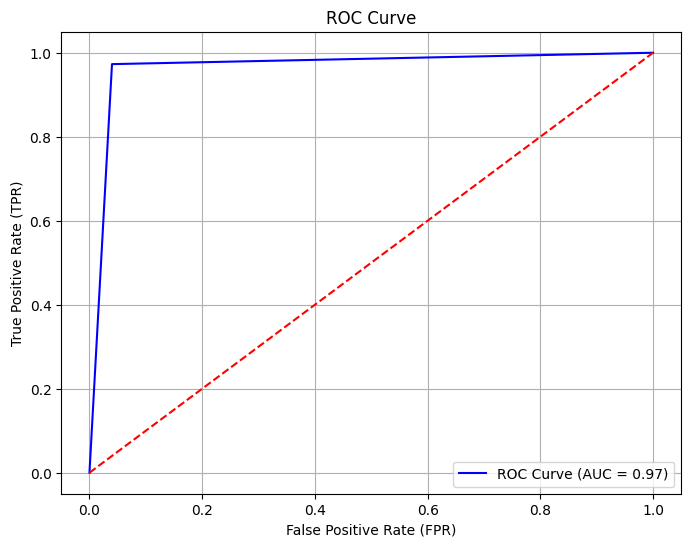

In [51]:
plt.figure(figsize=(8, 6))
plt.plot(FPR, TPR, color='blue', label=f'ROC Curve (AUC = {auc_curve:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [46]:
df.head()

,Location,Employment_Status,Age,Income,Credit_Score,Loan_Amount,Existing_Loan_Balance,Interest_Rate,Loan_Duration_Months,Loan_Status
0,2,0,56,91910.323246,615,27160.609602,3580.203540,11.562543,27,1
1,2,0,46,81880.547904,702,22931.663587,38762.098480,5.241453,54,1
2,1,1,32,89696.082903,747,6787.299376,8412.342168,6.928529,55,1
3,1,0,60,37123.175342,846,29646.934665,2051.077370,14.422941,17,1
4,0,1,25,67655.479665,425,11137.769677,29518.957965,10.970186,21,0


In [47]:
pd.DataFrame(x_test,y_test)

,0,1,2,3,4,5,6,7,8
Loan_Status,,,,,,,,,
0,-0.004582,-0.659864,0.511672,-1.126874,-0.526682,-0.784506,0.592296,1.685946,0.513359
1,1.220902,-0.659864,0.065037,-0.357876,-1.598030,-1.342431,-0.125267,0.117843,-0.066172
1,1.220902,1.515464,-1.572626,0.873300,-0.032707,0.360471,-1.427566,-1.697426,-0.066172
1,-0.004582,1.515464,0.883869,-0.178109,1.308082,1.657732,0.133464,-0.163384,0.049734
0,-0.004582,1.515464,1.553822,-0.203472,-1.488971,-0.796192,1.531007,-0.647020,1.672420
...,...,...,...,...,...,...,...,...,...
0,-1.230065,-0.659864,-0.902673,-0.895665,0.679387,0.432237,0.583798,-0.460597,-0.761609
1,-1.230065,-0.659864,1.181626,-0.312427,0.153336,-0.529082,-0.672137,1.219972,-1.688858
1,-0.004582,1.515464,0.139476,1.643000,-1.309343,1.394501,1.060160,-1.598333,1.034936


In [48]:
user_data = np.array([[-0.006622,	1.515567,	0.357222,	-0.821926,	1.079502,	0.124620,	0.664287,	-0.458840,	-1.239649	]])

user_data_pred = model_rfc.predict(user_data)
if user_data_pred == 1:
  print("Loan can be approved")
else:
  print("Loan cannot be approved")

Loan cannot be approved


In [49]:
user_data = np.array([[	-0.006622	,-0.659819,	1.027662,	1.315046,	-1.560143,	-1.474798	,-1.564300,	0.931510,	-0.657695	]])

user_data_pred = model_rfc.predict(user_data)
if user_data_pred == 1:
  print("Loan can be approved")
else:
  print("Loan cannot be approved")

Loan can be approved


In [98]:
df_filtered=df[df["Loan_Status"]==0]
df_filtered

,Location,Employment_Status,Age,Income,Credit_Score,Loan_Amount,Existing_Loan_Balance,Interest_Rate,Loan_Duration_Months,Loan_Status
4,0,1,25,67655.479665,425,11137.769677,29518.957965,10.970186,21,0
5,2,0,38,27487.130566,795,25771.106422,33429.681844,11.447400,27,0
6,2,0,56,36182.461403,344,18902.137804,38013.958210,18.838415,66,0
11,2,0,41,25664.281097,706,19231.429017,44486.070681,17.110298,12,0
12,1,0,53,50119.215628,743,36651.235877,35321.352481,12.636722,16,0
...,...,...,...,...,...,...,...,...,...,...
9978,1,0,20,68714.641679,675,47709.566901,44932.989631,12.762819,33,0
9982,2,0,29,43582.736734,318,40876.169626,25100.722343,4.134004,54,0
9985,1,0,60,87990.381169,532,31089.829118,9515.583160,14.784562,64,0
9989,2,0,23,30081.174082,605,15533.934628,12106.168054,8.263263,68,0


In [50]:
user_data = np.array([[2,	0,	38,	27487.130566,	795,	25771.106422,	33429.681844,	11.447400,	27]])
user_data_scaled = scaler.transform(user_data)

user_data_pred = model_rfc.predict(user_data_scaled)
user_data_pred = [1]
if user_data_pred == 1:
    print("Loan can be approved")
else:
    print("Loan cannot be approved")

Loan cannot be approved
